In [101]:
%load_ext autoreload
%autoreload 2

import sys
import copy
import math
import pickle

sys.path.append("../../")

import numpy as np
import torch
import matplotlib.pyplot as plt

import implicitmodules.torch as dm

#torch.set_num_threads(6)
torch.set_default_tensor_type(torch.FloatTensor)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
a = 1.
source = torch.tensor([[-a, -a], [a, -a], [a, a], [-a, a]])
b = 2.
target = torch.tensor([[-b, -b], [b, -b], [b, b], [-b, b]])


(-2.2, 2.2, -2.2, 2.2)

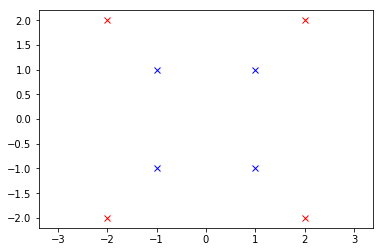

In [103]:
plt.plot(source[:, 0], source[:, 1], 'xb')
plt.plot(target[:, 0], target[:, 1], 'xr')
plt.axis('equal')

In [104]:
centre = torch.tensor([[0., 0.]])
cotan = torch.tensor([[0., 0.]])

In [111]:
sigma = 3.

Scaling = dm.DeformationModules.LocalRotation.build(dim=2, nb_pts=centre.shape[0], sigma=sigma, coeff=1., gd=centre.requires_grad_(), cotan = cotan.requires_grad_())

(-2.845967376232147,
 2.5653169989585876,
 -2.845967376232147,
 2.5653169989585876)

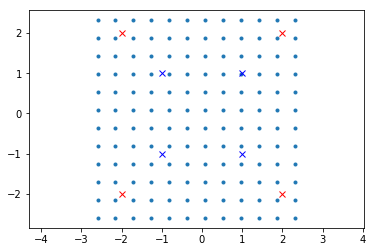

In [112]:
fac = 1.3
aabb = dm.Utilities.AABB.build_from_points(fac * target)
density = 5


grid = dm.Utilities.fill_area_uniform_density(dm.Utilities.area_shape, aabb, density, shape=fac * target, side=1)
plt.plot(grid[:, 0], grid[:,1], '.')
plt.plot(source[:, 0], source[:, 1], 'xb')
plt.plot(target[:, 0], target[:, 1], 'xr')
plt.axis('equal')

In [113]:
control = -torch.ones(1)
Scaling.fill_controls(control)

In [114]:
speed = Scaling(grid).detach()

(-2.845967376232147,
 2.5653169989585876,
 -2.845967376232147,
 2.5653169989585876)

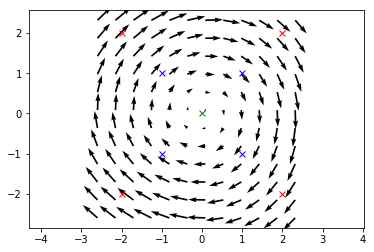

In [115]:
plt.quiver(grid.detach()[:, 0], grid.detach()[:,1], speed[:,0], speed[:,1])
plt.plot(source.detach()[:, 0], source.detach()[:, 1], 'xb')
plt.plot(target[:, 0], target[:, 1], 'xr')
plt.plot(centre.detach()[:, 0], centre.detach()[:, 1], 'xg')
plt.axis('equal')

In [116]:
cotan_sil = torch.zeros_like(source)
cotan_sil[0][0] = 10

Silent_grid = dm.DeformationModules.SilentLandmarks(dim=2, nb_pts=grid.shape[0], gd=grid.requires_grad_())
Silent_shape = dm.DeformationModules.SilentLandmarks(dim=2, nb_pts=source.shape[0], gd=source.requires_grad_(), cotan=cotan_sil.requires_grad_())


In [117]:
intermediate_states, intermediate_controls = dm.HamiltonianDynamic.shoot(dm.HamiltonianDynamic.Hamiltonian([Silent_grid, Scaling, Silent_shape]), 10, 'euler', intermediates=True)


(-3.511968660354614,
 3.1542940616607664,
 -3.486090087890625,
 3.1832746505737304)

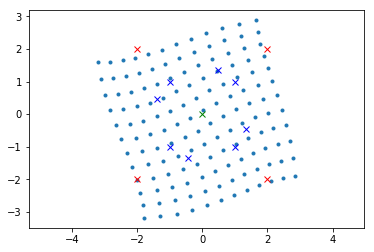

In [118]:
t = 10
grid_t = intermediate_states[t].gd[0].detach()
centre_t = intermediate_states[t].gd[1].detach()
shape_t = intermediate_states[t].gd[2].detach()

plt.plot(grid_t[:, 0], grid_t[:,1], '.')
plt.plot(centre_t[:, 0], centre_t[:, 1], 'xg')
plt.plot(shape_t[:, 0], shape_t[:, 1], 'xb')
plt.plot(source.detach()[:, 0], source.detach()[:, 1], 'xb')
plt.plot(target[:, 0], target[:, 1], 'xr')
plt.axis('equal')

In [119]:
print(intermediate_controls)

[[tensor([]), tensor(3.2433), tensor([])], [tensor([]), tensor(3.2475), tensor([])], [tensor([]), tensor(3.2517), tensor([])], [tensor([]), tensor(3.2559), tensor([])], [tensor([]), tensor(3.2602), tensor([])], [tensor([]), tensor(3.2646), tensor([])], [tensor([]), tensor(3.2689), tensor([])], [tensor([]), tensor(3.2733), tensor([])], [tensor([]), tensor(3.2778), tensor([])], [tensor([]), tensor(3.2823), tensor([])]]
